In [2]:
import numpy as np
from gan import GAN
training_cats= GAN.load_data()
print(training_cats.shape)

Using TensorFlow backend.


(15747, 64, 64, 3)


In [14]:
import cv2
norm_image = cv2.normalize(training_cats, None, alpha = 0, beta = 255, 
                           norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)

norm_image = norm_image.astype(np.uint8)

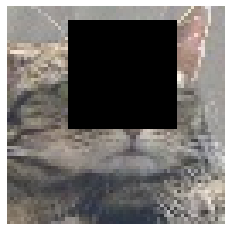

(<matplotlib.image.AxesImage at 0x7f819be30ad0>,
 (-0.5, 63.5, 63.5, -0.5),
 None)

In [28]:
import imageio
import random
from matplotlib import pyplot as plt
import numpy as np
img_0=rect(15747,norm_image,share=0.5)[9].reshape(64,64,3).astype(int)
plt.imshow(img_0), plt.axis('off'), plt.show()

In [29]:
import cv2 as cv
def Gaussian_Blur (images, ksize = 5, alpha = 0): 
    """
  Convolve images with a Gaussian kernel 
  Input Arguments: 
  image: all training data 
  ksize: kernel size 
  alpha: standard deviation of the Gaussian kernel 
    choices of alpha: 0, 1, 2, 4
    """
    if ksize == 0:
        return images
  # kernel = np.random.normal(mean, sigma, (ksize,ksize)) #Gaussian Kernel
    examp_num = images.shape[0]
    new_images = []
    for i in range(examp_num): 
        image = images[i].copy()
        new = cv.GaussianBlur(image, ksize=(int(ksize), int(ksize)), sigmaX=int(alpha))
        new_images.append(new)
    new_images = np.array(new_images)
    return new_images

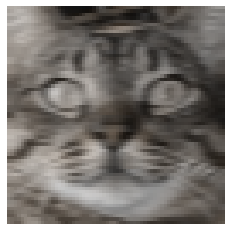

(<matplotlib.image.AxesImage at 0x7f81c89e6f50>,
 (-0.5, 63.5, 63.5, -0.5),
 None)

In [35]:
plt.imshow(Gaussian_Blur(norm_image[2], alpha = 0)), plt.axis('off'), plt.show()

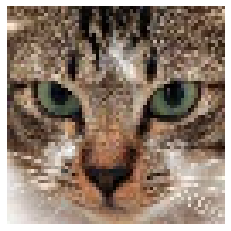

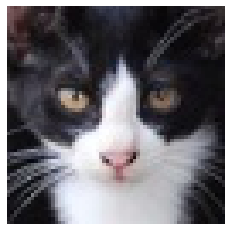

In [1]:
import imageio
import random
from matplotlib import pyplot as plt
import numpy as np

im = imageio.imread('sample_cats.jpg')
im2 = imageio.imread('sample_cats2.jpg')
plt.imshow(im), plt.axis('off'), plt.show()
plt.imshow(im2), plt.axis('off'), plt.show()
img=im.astype(np.float).flatten()

In [2]:
arrs = [np.array(im)
        for i in range(50)]
arrs[1]=np.array(im2)
res = np.array(arrs)
res.shape

(50, 64, 64, 3)

In [3]:
res[1,:,:,:]=im2
i=0
for img in res:
    i+=1
i

50

In [71]:
res[1]

array([[[127,  96, 101],
        [106,  76,  78],
        [ 88,  58,  60],
        ...,
        [ 49,  43,  45],
        [ 50,  44,  44],
        [ 57,  51,  51]],

       [[126,  95, 100],
        [116,  86,  88],
        [102,  72,  74],
        ...,
        [ 45,  39,  41],
        [ 55,  49,  49],
        [ 50,  44,  44]],

       [[115,  84,  89],
        [114,  84,  86],
        [104,  74,  76],
        ...,
        [ 44,  38,  40],
        [ 49,  43,  45],
        [ 49,  43,  43]],

       ...,

       [[ 16,  14,  19],
        [ 39,  37,  42],
        [ 55,  54,  59],
        ...,
        [  7,   7,   9],
        [ 13,  12,  17],
        [  8,   9,  13]],

       [[ 28,  26,  31],
        [ 42,  40,  45],
        [ 16,  15,  20],
        ...,
        [ 21,  21,  23],
        [  9,   8,  13],
        [ 14,  15,  19]],

       [[ 43,  41,  46],
        [ 30,  28,  33],
        [ 13,  12,  17],
        ...,
        [ 22,  22,  24],
        [ 11,  12,  16],
        [ 14,  15,  19]]

In [4]:
def rect(image_num,res, share, hi=64, wi=64, chan=3):
    '''
    Apply n_rect numbers of black rectangles to images
    
    Input Arguments:
    image_num: number of images in input
    res: training data(RGD channel range(0,225),4d)
    share: control the size of implanted rectangles(0-1)
    hi,wi,chan: shape of images
    '''
    result = np.zeros_like(res)
    for i in range(image_num):

        rhi = np.int(hi*share)
        rwi = np.int(wi*share)
        xpos = random.randint(0, hi-rhi)            
        ypos = random.randint(0, wi-rwi)
        xdim = xpos + rhi
        ydim = ypos + rwi
        
        img_i = res[i,:].copy()

        img_i[xpos:xdim,ypos:ydim,:] = np.ones((rhi, rwi, chan))*0.0
        result[i,:,:,:]=img_i
    return result

In [74]:
#rect_alphas = [0.0, 0.25, 0.5, 0.75] for share

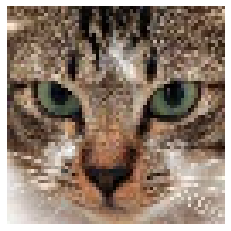

(<matplotlib.image.AxesImage at 0x7f9871222e10>,
 (-0.5, 63.5, 63.5, -0.5),
 None)

In [75]:
img_0=rect(2,res,share=0)[0].reshape(64,64,3).astype(int)
plt.imshow(img_0), plt.axis('off'), plt.show()

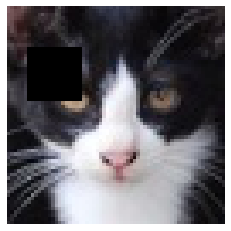

(<matplotlib.image.AxesImage at 0x7f985021d810>,
 (-0.5, 63.5, 63.5, -0.5),
 None)

In [76]:
img1=rect(2,res,share=0.25)[1].reshape(64,64,3).astype(int)
plt.imshow(img1), plt.axis('off'), plt.show()

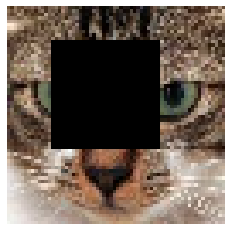

(<matplotlib.image.AxesImage at 0x7f987b1b9150>,
 (-0.5, 63.5, 63.5, -0.5),
 None)

In [77]:
img2=rect(2,res,share=0.50)[0].reshape(64,64,3).astype(int)
plt.imshow(img2), plt.axis('off'), plt.show()

In [131]:
from skimage.transform import swirl
def apply_swirl(image_num,res, n_swirls, radius=30, strength=3, hi=64, wi=64, chan=3):
    '''
    Apply Swirl to images
    
    Input Arguments:
    image_num: number of images in the input
    res: training data(number of images, RGD channel range(0,225),4 dim)
    n_swirls: number of swirls applied
    hi,wi,chan: shape of images
    '''
    result = np.zeros_like(res).astype(float)
    for i in range(image_num):
        img = res[i,:].copy()

        for j in range(n_swirls):

            xpos = hi // 2
            ypos = wi // 2
            center = (xpos,ypos)
            img = swirl(img, rotation=0, strength=strength, radius=radius, center=center)
        result[i,:,:,:]=img
    return result

In [132]:
alphas = [0.0, 1.0, 2.0, 4.0]

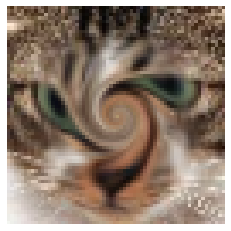

(<matplotlib.image.AxesImage at 0x7f987b840550>,
 (-0.5, 63.5, 63.5, -0.5),
 None)

In [133]:
img3=apply_swirl(2,res,n_swirls=4)[0].reshape(64,64,3)
plt.imshow(img3), plt.axis('off'), plt.show()

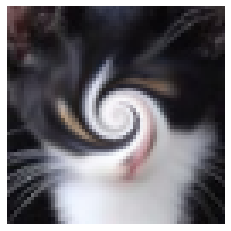

(<matplotlib.image.AxesImage at 0x7f987185c710>,
 (-0.5, 63.5, 63.5, -0.5),
 None)

In [135]:
img5=apply_swirl(2,res,n_swirls=4)[1].reshape(64,64,3)
plt.imshow(img5), plt.axis('off'), plt.show()